# Import Dependencies

In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
from api_key import g_key

ModuleNotFoundError: No module named 'api_key'

# Create DataFrames (by region)

In [4]:
#File paths of the CSV files (by region)
vaccine_csv = ("Booster_Region.csv")
daily_deaths_csv = ('Deaths_Region.csv')
hosp_admissions = ('Hops_Admits_Region.csv')
cases_csv = ("Cases_Region.csv")


#file paths for the CSV files for UK as a whole
daily_cases = ('daily_cases.csv')
daily_deaths_ukcsv = ('daily_covid_deaths.csv')
hospital_admissions_ukcsv = ('hospital_admissions.csv')
first_dose = ('first_dose.csv')
second_dose = ('second_dose.csv')


#Import the CSVs to be used (by region)
daily_deaths_df = pd.read_csv(daily_deaths_csv)
hosp_admissions_df = pd.read_csv(hosp_admissions)
booster_df = pd.read_csv(vaccine_csv)
cases_df = pd.read_csv(cases_csv)



#create dataframes for UK as a whole
daily_cases_uk = pd.read_csv(daily_cases)
daily_deaths_uk = pd.read_csv(daily_deaths_ukcsv)
hospital_admissions_uk = pd.read_csv(hospital_admissions_ukcsv)
first_dose_df = pd.read_csv(first_dose)
second_dose_df = pd.read_csv(second_dose)

In [5]:
#Show contents of the dataframes
daily_deaths_df.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,region,East of England,E12000006,11/07/2022,6,18320,NaN,NaN,NaN
1,region,East of England,E12000006,10/07/2022,5,18314,NaN,NaN,NaN
2,region,East of England,E12000006,09/07/2022,8,18309,NaN,NaN,NaN
3,region,East of England,E12000006,08/07/2022,10,18301,NaN,NaN,NaN
4,region,East of England,E12000006,07/07/2022,11,18291,NaN,NaN,NaN


In [6]:
hosp_admissions_df.head()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,nhsRegion,Midlands,E40000008,11/07/2022,428,155627
1,nhsRegion,Midlands,E40000008,10/07/2022,375,155199
2,nhsRegion,Midlands,E40000008,09/07/2022,314,154824
3,nhsRegion,Midlands,E40000008,08/07/2022,365,154510
4,nhsRegion,Midlands,E40000008,07/07/2022,421,154145


In [7]:
booster_df.head()

,areaType,areaName,areaCode,date,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate
0,region,Midlands,E12000004,12/07/2022,118,8249096,602,7860426,901.0,6195713.0
1,region,Midlands,E12000004,11/07/2022,181,8248978,713,7859824,1079.0,6194812.0
2,region,Midlands,E12000004,10/07/2022,112,8248797,690,7859111,586.0,6193733.0
3,region,Midlands,E12000004,09/07/2022,335,8248685,1909,7858421,1334.0,6193147.0
4,region,Midlands,E12000004,08/07/2022,178,8248350,784,7856512,1065.0,6191813.0


In [8]:
cases_df.head()

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0


In [9]:
#Begin merging the dataframes
cases_deaths_df = pd.merge(cases_df, daily_deaths_df, on=["date", "areaName"], how="outer")

cases_deaths_df.head()

,areaType_x,areaName,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,areaType_y,areaCode_y,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0,region,E12000009,3.0,11227.0,NaN,NaN,NaN
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0,region,E12000009,9.0,11224.0,NaN,NaN,NaN
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0,region,E12000009,14.0,11215.0,NaN,NaN,NaN
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0,region,E12000009,5.0,11201.0,NaN,NaN,NaN


In [10]:
add_hosp_df = pd.merge(cases_deaths_df, hosp_admissions_df, on=["date", "areaName"], how="outer")
add_hosp_df.head()

,areaType_x,areaName,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,areaCode_y,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Unnamed: 6,Unnamed: 7,Unnamed: 8,areaType,areaCode,newAdmissions,cumAdmissions
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0,...,E12000009,3.0,11227.0,NaN,NaN,NaN,nhsRegion,E40000006,208.0,65498.0
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0,...,E12000009,9.0,11224.0,NaN,NaN,NaN,nhsRegion,E40000006,190.0,65290.0
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0,...,E12000009,14.0,11215.0,NaN,NaN,NaN,nhsRegion,E40000006,154.0,65100.0
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0,...,E12000009,5.0,11201.0,NaN,NaN,NaN,nhsRegion,E40000006,146.0,64946.0


In [12]:
full_covid = pd.merge(add_hosp_df, booster_df, on=["date", "areaName"], how="outer")
full_covid

,areaType_x,areaName,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,newAdmissions,cumAdmissions,areaType_y,areaCode_y,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0,...,NaN,NaN,region,E12000009,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0,...,208.0,65498.0,region,E12000009,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0,...,190.0,65290.0,region,E12000009,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0,...,154.0,65100.0,region,E12000009,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0,...,146.0,64946.0,region,E12000009,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,region,East of England,E12000006,07/02/2020,0,3,0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6197,region,East of England,E12000006,06/02/2020,0,3,0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6198,region,East of England,E12000006,05/02/2020,0,3,0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6199,region,East of England,E12000006,04/02/2020,0,3,0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Display the total columns of the dataframe
full_covid.columns

Index(['areaType_x', 'areaName', 'areaCode_x', 'date',
       'newCasesBySpecimenDate', 'cumCasesBySpecimenDate',
       'newFirstEpisodesBySpecimenDate', 'cumFirstEpisodesBySpecimenDate',
       'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate',
       'areaType_y', 'areaCode_y', 'newDeaths28DaysByDeathDate',
       'cumDeaths28DaysByDeathDate', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'areaType_x', 'areaCode_x', 'newAdmissions', 'cumAdmissions',
       'areaType_y', 'areaCode_y',
       'newPeopleVaccinatedFirstDoseByVaccinationDate',
       'cumPeopleVaccinatedFirstDoseByVaccinationDate',
       'newPeopleVaccinatedSecondDoseByVaccinationDate',
       'cumPeopleVaccinatedSecondDoseByVaccinationDate',
       'newPeopleVaccinatedThirdInjectionByVaccinationDate',
       'cumPeopleVaccinatedThirdInjectionByVaccinationDate'],
      dtype='object')

In [14]:
#Drop unwanted columns
full_covid = full_covid[['areaName','date', 'newCasesBySpecimenDate', 'cumCasesBySpecimenDate', 
                         'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate', 
                         'newDeaths28DaysByDeathDate', 'cumDeaths28DaysByDeathDate',
                         'newAdmissions', 'cumAdmissions',
                         'newPeopleVaccinatedFirstDoseByVaccinationDate',
                         'cumPeopleVaccinatedFirstDoseByVaccinationDate',
                         'newPeopleVaccinatedSecondDoseByVaccinationDate',
                         'cumPeopleVaccinatedSecondDoseByVaccinationDate',
                         'newPeopleVaccinatedThirdInjectionByVaccinationDate',
                         'cumPeopleVaccinatedThirdInjectionByVaccinationDate'
                        ]]
full_covid.columns

Index(['areaName', 'date', 'newCasesBySpecimenDate', 'cumCasesBySpecimenDate',
       'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate',
       'newDeaths28DaysByDeathDate', 'cumDeaths28DaysByDeathDate',
       'newAdmissions', 'cumAdmissions',
       'newPeopleVaccinatedFirstDoseByVaccinationDate',
       'cumPeopleVaccinatedFirstDoseByVaccinationDate',
       'newPeopleVaccinatedSecondDoseByVaccinationDate',
       'cumPeopleVaccinatedSecondDoseByVaccinationDate',
       'newPeopleVaccinatedThirdInjectionByVaccinationDate',
       'cumPeopleVaccinatedThirdInjectionByVaccinationDate'],
      dtype='object')

In [15]:
#Rename columns
full_covid_renamed = full_covid.rename(columns={"date": "Date", "areaName": "Region",
                           "newCasesBySpecimenDate" : "New Cases",
                           "cumCasesBySpecimenDate" : "New Cases (cumulative)",
                           "newReinfectionsBySpecimenDate" : "Reinfections",
                           "cumReinfectionsBySpecimenDate" : "Reinfections (cumulative)",                    
                           "newPeopleVaccinatedFirstDoseByVaccinationDate": "New Vaccinations, 1st dose",
                           "cumPeopleVaccinatedFirstDoseByVaccinationDate": "New Vaccinations, 1st dose (cumulative)",
                           "newPeopleVaccinatedSecondDoseByVaccinationDate": "New Vaccinations, 2nd dose",
                           "cumPeopleVaccinatedSecondDoseByVaccinationDate": "New Vaccinations, 2nd dose (cumulative)",
                            "newPeopleVaccinatedThirdInjectionByVaccinationDate": "New Vaccinations, Booster",
                            "cumPeopleVaccinatedThirdInjectionByVaccinationDate": "New Vaccinations, Booster (cumulative)",
                           "newDeaths28DaysByDeathDate": "New Daily Deaths",
                           "cumDeaths28DaysByDeathDate": "New Daily Deaths (cumulative)",
                           "newAdmissions":"New Hospital Admissions",
                           "cumAdmissions": "New Hospital Admissions (cumulative)"})
full_covid_renamed.head()

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)"
0,South West,12/07/2022,1879,1836485,356.0,97451.0,NaN,NaN,NaN,NaN,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0
1,South West,11/07/2022,2756,1834606,552.0,97095.0,3.0,11227.0,208.0,65498.0,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0
2,South West,10/07/2022,2566,1831850,497.0,96543.0,9.0,11224.0,190.0,65290.0,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0
3,South West,09/07/2022,2199,1829284,417.0,96046.0,14.0,11215.0,154.0,65100.0,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0
4,South West,08/07/2022,2615,1827085,466.0,95629.0,5.0,11201.0,146.0,64946.0,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0


In [16]:
full_covid_renamed.to_csv("full_covid_renamed.csv", index=False)

In [17]:
#Convert the date to a timestamp for calculation purposes
full_covid_date = pd.to_datetime(full_covid_renamed["Date"]).map(pd.Timestamp.timestamp)
full_covid_date
#Add the timestamp column to the dataframe
full_covid_renamed["Timestamp"] = full_covid_date
full_covid_renamed

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp
0,South West,12/07/2022,1879,1836485,356.0,97451.0,NaN,NaN,NaN,NaN,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0,1.670371e+09
1,South West,11/07/2022,2756,1834606,552.0,97095.0,3.0,11227.0,208.0,65498.0,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0,1.667779e+09
2,South West,10/07/2022,2566,1831850,497.0,96543.0,9.0,11224.0,190.0,65290.0,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0,1.665101e+09
3,South West,09/07/2022,2199,1829284,417.0,96046.0,14.0,11215.0,154.0,65100.0,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0,1.662509e+09
4,South West,08/07/2022,2615,1827085,466.0,95629.0,5.0,11201.0,146.0,64946.0,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0,1.659830e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,East of England,07/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.593648e+09
6197,East of England,06/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.591056e+09
6198,East of England,05/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.588378e+09
6199,East of England,04/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.585786e+09


In [18]:
#Group by region to get summaries by region
summary_stats = full_covid_renamed.groupby(["Region"]).max()
summary_df = pd.DataFrame(summary_stats)
summary_df

,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp
Region,,,,,,,,,,,,,,,,
East of England,31/12/2021,23990,2126367,1821.0,117401.0,203.0,18320.0,524.0,78276.0,80038.0,4921533.0,67395.0,4720746.0,96604.0,3820972.0,1.670371e+09
London,31/12/2021,36921,3001412,3134.0,173474.0,232.0,20410.0,977.0,128548.0,65902.0,6495206.0,56454.0,6087184.0,118816.0,4405875.0,1.670371e+09
Midlands,31/12/2021,45439,3632012,4730.0,216315.0,226.0,33127.0,862.0,155627.0,137909.0,8249096.0,102983.0,7860426.0,157334.0,6195713.0,1.670371e+09
North East and Yorkshire,31/12/2021,44060,2855588,5460.0,185068.0,128.0,25018.0,507.0,134420.0,108519.0,6308672.0,84277.0,6007153.0,116491.0,4768006.0,1.670371e+09
North West,31/12/2021,40221,2665613,5194.0,177697.0,166.0,25299.0,485.0,122631.0,85430.0,5640462.0,66551.0,5357551.0,95702.0,4155410.0,1.670371e+09
South East,31/12/2021,31863,3152816,2572.0,167089.0,285.0,23419.0,716.0,106378.0,131344.0,7362159.0,93748.0,7064374.0,155126.0,5788792.0,1.670371e+09
South West,31/12/2021,17082,1836485,1381.0,97451.0,109.0,11227.0,347.0,65498.0,84476.0,4623975.0,77398.0,4442401.0,109767.0,3708049.0,1.670371e+09


In [19]:
#Drop unwanted columns
summary_group = summary_df[["New Cases (cumulative)", "Reinfections (cumulative)", 
                               "New Daily Deaths (cumulative)","New Hospital Admissions (cumulative)", 
                               "New Vaccinations, 1st dose (cumulative)", "New Vaccinations, 2nd dose (cumulative)",
                               "New Vaccinations, Booster (cumulative)", "Timestamp"]]
summary_group

,New Cases (cumulative),Reinfections (cumulative),New Daily Deaths (cumulative),New Hospital Admissions (cumulative),"New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster (cumulative)",Timestamp
Region,,,,,,,,
East of England,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0,1.670371e+09
London,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0,1.670371e+09
Midlands,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0,1.670371e+09
North East and Yorkshire,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0,1.670371e+09
North West,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0,1.670371e+09
South East,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0,1.670371e+09
South West,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0,1.670371e+09


In [20]:
#Convert the timestamp to a date and add it to the dataframe
actual_date = pd.to_datetime(summary_group["Timestamp"],unit='s')
summary_group["Date"]  = actual_date
summary_group[["Date", "New Cases (cumulative)", "Reinfections (cumulative)", "New Daily Deaths (cumulative)",
              "New Hospital Admissions (cumulative)", "New Vaccinations, 1st dose (cumulative)",
              "New Vaccinations, 2nd dose (cumulative)", "New Vaccinations, Booster (cumulative)"]]

C:\Users\A454\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,New Cases (cumulative),Reinfections (cumulative),New Daily Deaths (cumulative),New Hospital Admissions (cumulative),"New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster (cumulative)"
Region,,,,,,,,
East of England,2022-12-07,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0
London,2022-12-07,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0
Midlands,2022-12-07,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0
North East and Yorkshire,2022-12-07,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0
North West,2022-12-07,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0
South East,2022-12-07,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0
South West,2022-12-07,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0


In [21]:
#Rename columns
summary_renamed = summary_group.rename(columns={"Date":"Date",
                                             "New Cases (cumulative)": "Total Cases",
                                             "Reinfections (cumulative)": "Total Reinfections",
                                             "New Daily Deaths (cumulative)": "Total Deaths",
                                             "New Hospital Admissions (cumulative)": "Total Hospital Admissions",
                                             "New Vaccinations, 1st dose (cumulative)": "1st Vaccine Total",
                                             "New Vaccinations, 2nd dose (cumulative)": "2nd Vaccine Total",
                                             "New Vaccinations, Booster (cumulative)": "Total Booster Vaccinations"})
summary_renamed

,Total Cases,Total Reinfections,Total Deaths,Total Hospital Admissions,1st Vaccine Total,2nd Vaccine Total,Total Booster Vaccinations,Timestamp,Date
Region,,,,,,,,,
East of England,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0,1.670371e+09,2022-12-07
London,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0,1.670371e+09,2022-12-07
Midlands,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0,1.670371e+09,2022-12-07
North East and Yorkshire,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0,1.670371e+09,2022-12-07
North West,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0,1.670371e+09,2022-12-07
South East,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0,1.670371e+09,2022-12-07
South West,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0,1.670371e+09,2022-12-07


In [22]:
#Pie chart of total cases
#Bar graph of deaths
#Horizontal bar graph Vaccinations
#Timeline number of cases and hospital admissions
#Timeline number of cases and vaccines for the UK
#Highly populated cities have a higher rate of infection - Ttest
#Heatmap- Cases by region
#Heatmap- before lockdown and after lockdown

# Create DataFrames (UK as a whole) 

In [36]:
#file paths for the CSV files for UK as a whole
daily_cases = ('daily_cases.csv')
daily_deaths_ukcsv = ('daily_covid_deaths.csv')
hospital_admissions_ukcsv = ('hospital_admissions.csv')
first_dose = ('first_dose.csv')
second_dose = ('second_dose.csv')


#create dataframes for UK as a whole
daily_cases_uk = pd.read_csv(daily_cases)
daily_deaths_uk = pd.read_csv(daily_deaths_ukcsv)
hospital_admissions_uk = pd.read_csv(hospital_admissions_ukcsv)
first_dose_df = pd.read_csv(first_dose)
second_dose_df = pd.read_csv(second_dose)

In [37]:
#Start merging the dataframes 

first_merge = pd.merge(daily_cases_uk,daily_deaths_uk, on=["date"], how="outer")
first_merge

,areaType_x,areaName_x,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,areaType_y,areaName_y,areaCode_y,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate
0,overview,United Kingdom,K02000001,2022-05-19,6818.0,22243056.0,5622.0,21054108.0,1196.0,1188948.0,NaN,NaN,NaN,NaN,NaN
1,overview,United Kingdom,K02000001,2022-05-18,7634.0,22236238.0,6364.0,21048486.0,1270.0,1187752.0,NaN,NaN,NaN,NaN,NaN
2,overview,United Kingdom,K02000001,2022-05-17,8283.0,22228604.0,6899.0,21042122.0,1384.0,1186482.0,NaN,NaN,NaN,NaN,NaN
3,overview,United Kingdom,K02000001,2022-05-16,9416.0,22220321.0,7741.0,21035223.0,1675.0,1185098.0,NaN,NaN,NaN,NaN,NaN
4,overview,United Kingdom,K02000001,2022-05-15,7969.0,22210905.0,6683.0,21027482.0,1286.0,1183423.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,NaN,NaN,NaN,03/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,0.0,2.0
1721,NaN,NaN,NaN,02/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,1.0,2.0
1722,NaN,NaN,NaN,01/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,0.0,1.0
1723,NaN,NaN,NaN,31/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,0.0,1.0


In [38]:
second_merge = pd.merge(first_merge, hospital_admissions_uk, on=["date"], how="outer")
second_merge

,areaType_x,areaName_x,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,areaType_y,areaName_y,areaCode_y,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate,areaType,areaName,areaCode,newAdmissions,cumAdmissions
0,overview,United Kingdom,K02000001,2022-05-19,6818.0,22243056.0,5622.0,21054108.0,1196.0,1188948.0,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,660.0,866979.0
1,overview,United Kingdom,K02000001,2022-05-18,7634.0,22236238.0,6364.0,21048486.0,1270.0,1187752.0,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,731.0,866319.0
2,overview,United Kingdom,K02000001,2022-05-17,8283.0,22228604.0,6899.0,21042122.0,1384.0,1186482.0,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,680.0,865588.0
3,overview,United Kingdom,K02000001,2022-05-16,9416.0,22220321.0,7741.0,21035223.0,1675.0,1185098.0,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,696.0,864908.0
4,overview,United Kingdom,K02000001,2022-05-15,7969.0,22210905.0,6683.0,21027482.0,1286.0,1183423.0,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,639.0,864212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,NaN,NaN,NaN,2022-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,595.0,869716.0
1770,NaN,NaN,NaN,2022-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,601.0,869121.0
1771,NaN,NaN,NaN,2022-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,542.0,868520.0
1772,NaN,NaN,NaN,2022-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,460.0,867978.0


In [39]:
third_merge = pd.merge(second_merge, first_dose_df, on=["date"], how="outer")
third_merge

,areaType_x,areaName_x,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,areaType_x,areaName_x,areaCode_x,newAdmissions,cumAdmissions,areaType_y,areaName_y,areaCode_y,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate
0,overview,United Kingdom,K02000001,2022-05-19,6818.0,22243056.0,5622.0,21054108.0,1196.0,1188948.0,...,overview,United Kingdom,K02000001,660.0,866979.0,NaN,NaN,NaN,NaN,NaN
1,overview,United Kingdom,K02000001,2022-05-18,7634.0,22236238.0,6364.0,21048486.0,1270.0,1187752.0,...,overview,United Kingdom,K02000001,731.0,866319.0,NaN,NaN,NaN,NaN,NaN
2,overview,United Kingdom,K02000001,2022-05-17,8283.0,22228604.0,6899.0,21042122.0,1384.0,1186482.0,...,overview,United Kingdom,K02000001,680.0,865588.0,NaN,NaN,NaN,NaN,NaN
3,overview,United Kingdom,K02000001,2022-05-16,9416.0,22220321.0,7741.0,21035223.0,1675.0,1185098.0,...,overview,United Kingdom,K02000001,696.0,864908.0,NaN,NaN,NaN,NaN,NaN
4,overview,United Kingdom,K02000001,2022-05-15,7969.0,22210905.0,6683.0,21027482.0,1286.0,1183423.0,...,overview,United Kingdom,K02000001,639.0,864212.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,NaN,NaN,NaN,06/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,2785.0,53639145.0
1775,NaN,NaN,NaN,05/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,3096.0,53636360.0
1776,NaN,NaN,NaN,04/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,3545.0,53633264.0
1777,NaN,NaN,NaN,03/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,overview,United Kingdom,K02000001,3949.0,53629719.0


In [40]:
all_merge = pd.merge(third_merge, second_dose_df, on=["date"], how="outer")
all_merge #1779 rows × 30 columns

,areaType_x,areaName_x,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,areaType_y,areaName_y,areaCode_y,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,areaType,areaName,areaCode,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,2022-05-19,6818.0,22243056.0,5622.0,21054108.0,1196.0,1188948.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,overview,United Kingdom,K02000001,2022-05-18,7634.0,22236238.0,6364.0,21048486.0,1270.0,1187752.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,overview,United Kingdom,K02000001,2022-05-17,8283.0,22228604.0,6899.0,21042122.0,1384.0,1186482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,overview,United Kingdom,K02000001,2022-05-16,9416.0,22220321.0,7741.0,21035223.0,1675.0,1185098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,overview,United Kingdom,K02000001,2022-05-15,7969.0,22210905.0,6683.0,21027482.0,1286.0,1183423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,NaN,NaN,NaN,06/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,overview,United Kingdom,K02000001,2785.0,53639145.0,overview,United Kingdom,K02000001,8932.0,50253743.0
1775,NaN,NaN,NaN,05/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,overview,United Kingdom,K02000001,3096.0,53636360.0,overview,United Kingdom,K02000001,8453.0,50244811.0
1776,NaN,NaN,NaN,04/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,overview,United Kingdom,K02000001,3545.0,53633264.0,overview,United Kingdom,K02000001,8578.0,50236358.0
1777,NaN,NaN,NaN,03/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,...,overview,United Kingdom,K02000001,3949.0,53629719.0,overview,United Kingdom,K02000001,10635.0,50227780.0


## Cleaning UK data

In [41]:
all_merge.columns

Index(['areaType_x', 'areaName_x', 'areaCode_x', 'date',
       'newCasesBySpecimenDate', 'cumCasesBySpecimenDate',
       'newFirstEpisodesBySpecimenDate', 'cumFirstEpisodesBySpecimenDate',
       'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate',
       'areaType_y', 'areaName_y', 'areaCode_y',
       'newDailyNsoDeathsByDeathDate', 'cumDailyNsoDeathsByDeathDate',
       'areaType_x', 'areaName_x', 'areaCode_x', 'newAdmissions',
       'cumAdmissions', 'areaType_y', 'areaName_y', 'areaCode_y',
       'newPeopleVaccinatedFirstDoseByPublishDate',
       'cumPeopleVaccinatedFirstDoseByPublishDate', 'areaType', 'areaName',
       'areaCode', 'newPeopleVaccinatedSecondDoseByPublishDate',
       'cumPeopleVaccinatedSecondDoseByPublishDate'],
      dtype='object')

In [42]:
#drop irrelvent columns
all_merge = all_merge[['date', 'newCasesBySpecimenDate', 'cumCasesBySpecimenDate',
       'newFirstEpisodesBySpecimenDate', 'cumFirstEpisodesBySpecimenDate',
       'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate',
       'newDailyNsoDeathsByDeathDate', 'cumDailyNsoDeathsByDeathDate', 'newAdmissions',
       'cumAdmissions', 'newPeopleVaccinatedFirstDoseByPublishDate',
       'cumPeopleVaccinatedFirstDoseByPublishDate', 'newPeopleVaccinatedSecondDoseByPublishDate',
       'cumPeopleVaccinatedSecondDoseByPublishDate']]

In [43]:
all_merge #15columns left

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate,newAdmissions,cumAdmissions,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,2022-05-19,6818.0,22243056.0,5622.0,21054108.0,1196.0,1188948.0,NaN,NaN,660.0,866979.0,NaN,NaN,NaN,NaN
1,2022-05-18,7634.0,22236238.0,6364.0,21048486.0,1270.0,1187752.0,NaN,NaN,731.0,866319.0,NaN,NaN,NaN,NaN
2,2022-05-17,8283.0,22228604.0,6899.0,21042122.0,1384.0,1186482.0,NaN,NaN,680.0,865588.0,NaN,NaN,NaN,NaN
3,2022-05-16,9416.0,22220321.0,7741.0,21035223.0,1675.0,1185098.0,NaN,NaN,696.0,864908.0,NaN,NaN,NaN,NaN
4,2022-05-15,7969.0,22210905.0,6683.0,21027482.0,1286.0,1183423.0,NaN,NaN,639.0,864212.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,06/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2785.0,53639145.0,8932.0,50253743.0
1775,05/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096.0,53636360.0,8453.0,50244811.0
1776,04/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3545.0,53633264.0,8578.0,50236358.0
1777,03/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949.0,53629719.0,10635.0,50227780.0


In [44]:
#Still have some irrelevant columns - dropping these too
all_merge = all_merge.drop(columns=["newFirstEpisodesBySpecimenDate", "cumFirstEpisodesBySpecimenDate", "newReinfectionsBySpecimenDate", 
                        "cumReinfectionsBySpecimenDate"])
all_merge #11 columns left

,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newDailyNsoDeathsByDeathDate,cumDailyNsoDeathsByDeathDate,newAdmissions,cumAdmissions,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,2022-05-19,6818.0,22243056.0,NaN,NaN,660.0,866979.0,NaN,NaN,NaN,NaN
1,2022-05-18,7634.0,22236238.0,NaN,NaN,731.0,866319.0,NaN,NaN,NaN,NaN
2,2022-05-17,8283.0,22228604.0,NaN,NaN,680.0,865588.0,NaN,NaN,NaN,NaN
3,2022-05-16,9416.0,22220321.0,NaN,NaN,696.0,864908.0,NaN,NaN,NaN,NaN
4,2022-05-15,7969.0,22210905.0,NaN,NaN,639.0,864212.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1774,06/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,2785.0,53639145.0,8932.0,50253743.0
1775,05/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,3096.0,53636360.0,8453.0,50244811.0
1776,04/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,3545.0,53633264.0,8578.0,50236358.0
1777,03/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,3949.0,53629719.0,10635.0,50227780.0


In [45]:
all_merge.dtypes #shows the Date column is an 'object' - need this as a datetime format

date                                           object
newCasesBySpecimenDate                        float64
cumCasesBySpecimenDate                        float64
newDailyNsoDeathsByDeathDate                  float64
cumDailyNsoDeathsByDeathDate                  float64
newAdmissions                                 float64
cumAdmissions                                 float64
newPeopleVaccinatedFirstDoseByPublishDate     float64
cumPeopleVaccinatedFirstDoseByPublishDate     float64
newPeopleVaccinatedSecondDoseByPublishDate    float64
cumPeopleVaccinatedSecondDoseByPublishDate    float64
dtype: object

In [46]:
#Renaming columns 
all_merge_renamed = all_merge.rename(columns={"date": "Date",
                            "newCasesBySpecimenDate": "New Daily Cases",
                            "cumCasesBySpecimenDate": "New Daily Cases (cumulative)",
                           "newPeopleVaccinatedFirstDoseByPublishDate": "New Vaccinations, 1st dose",
                           "cumPeopleVaccinatedFirstDoseByPublishDate": "New Vaccinations, 1st dose (cumulative)",
                           "newPeopleVaccinatedSecondDoseByPublishDate": "New Vaccinations, 2nd dose",
                           "cumPeopleVaccinatedSecondDoseByPublishDate": "New Vaccinations, 2nd dose (cumulative)",
                           "newDailyNsoDeathsByDeathDate": "New Daily Deaths",
                           "cumDailyNsoDeathsByDeathDate": "New Daily Deaths (cumulative)",
                           "newAdmissions":"New Hospital Admissions",
                           "cumAdmissions": "New Hospital Admissions (cumulative)"})

In [47]:
all_merge_renamed['Date'] = pd.to_datetime(all_merge_renamed['Date'], dayfirst=True)
all_merge_renamed

,Date,New Daily Cases,New Daily Cases (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)"
0,2022-05-19,6818.0,22243056.0,NaN,NaN,660.0,866979.0,NaN,NaN,NaN,NaN
1,2022-05-18,7634.0,22236238.0,NaN,NaN,731.0,866319.0,NaN,NaN,NaN,NaN
2,2022-05-17,8283.0,22228604.0,NaN,NaN,680.0,865588.0,NaN,NaN,NaN,NaN
3,2022-05-16,9416.0,22220321.0,NaN,NaN,696.0,864908.0,NaN,NaN,NaN,NaN
4,2022-05-15,7969.0,22210905.0,NaN,NaN,639.0,864212.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1774,2022-07-06,NaN,NaN,NaN,NaN,NaN,NaN,2785.0,53639145.0,8932.0,50253743.0
1775,2022-07-05,NaN,NaN,NaN,NaN,NaN,NaN,3096.0,53636360.0,8453.0,50244811.0
1776,2022-07-04,NaN,NaN,NaN,NaN,NaN,NaN,3545.0,53633264.0,8578.0,50236358.0
1777,2022-07-03,NaN,NaN,NaN,NaN,NaN,NaN,3949.0,53629719.0,10635.0,50227780.0


In [48]:
#Sorting by "Date" - 
all_merged_sorted = all_merge_renamed.sort_values(by='Date')
all_merged_sorted

,Date,New Daily Cases,New Daily Cases (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)"
1724,2020-01-30,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
840,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1723,2020-01-31,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
839,2020-01-31,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,2020-02-01,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1727,2022-07-05,NaN,NaN,NaN,NaN,2155.0,914669.0,NaN,NaN,NaN,NaN
1775,2022-07-05,NaN,NaN,NaN,NaN,NaN,NaN,3096.0,53636360.0,8453.0,50244811.0
1726,2022-07-06,NaN,NaN,NaN,NaN,2166.0,916835.0,NaN,NaN,NaN,NaN
1774,2022-07-06,NaN,NaN,NaN,NaN,NaN,NaN,2785.0,53639145.0,8932.0,50253743.0


In [49]:
# Save this to a new CSV file
all_merged_sorted.to_csv("uk_data_sorted.csv", index=False)

In [81]:
summary_uk = all_merged_sorted.describe()
summary_uk

,New Daily Cases,New Daily Cases (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)"
count,841.000000,8.410000e+02,884.000000,884.000000,837.000000,837.000000,542.000000,5.430000e+02,542.000000,5.430000e+02
mean,26448.342449,6.179906e+06,226.523756,121198.904977,1093.689367,442328.065711,94750.619926,4.350426e+07,91996.944649,3.511540e+07
std,35210.529497,6.791098e+06,308.463118,63024.933202,872.690669,255106.499239,132231.279219,1.306624e+07,124258.589290,1.792545e+07
min,0.000000,1.000000e+00,0.000000,1.000000,73.000000,4874.000000,0.000000,2.286572e+06,818.000000,3.913990e+05
25%,2709.000000,3.348730e+05,40.000000,57991.000000,406.000000,157981.000000,12216.500000,3.849662e+07,11991.750000,2.383023e+07
50%,14817.000000,4.402868e+06,122.000000,153351.000000,888.000000,465569.000000,32427.500000,4.913342e+07,29316.000000,4.513625e+07
75%,37367.000000,8.908973e+06,218.000000,172119.250000,1525.000000,612323.000000,130685.000000,5.257729e+07,141668.250000,4.889390e+07
max,275648.000000,2.224306e+07,1489.000000,200247.000000,4580.000000,919019.000000,752308.000000,5.363914e+07,556951.000000,5.025374e+07


In [82]:
summary_uk = summary_uk.drop(['count','std', '25%', '50%', '75%'])

In [83]:
summary_uk

,New Daily Cases,New Daily Cases (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)"
mean,26448.342449,6.179906e+06,226.523756,121198.904977,1093.689367,442328.065711,94750.619926,4.350426e+07,91996.944649,3.511540e+07
min,0.000000,1.000000e+00,0.000000,1.000000,73.000000,4874.000000,0.000000,2.286572e+06,818.000000,3.913990e+05
max,275648.000000,2.224306e+07,1489.000000,200247.000000,4580.000000,919019.000000,752308.000000,5.363914e+07,556951.000000,5.025374e+07


## Charts and Graphs

### (By Region)

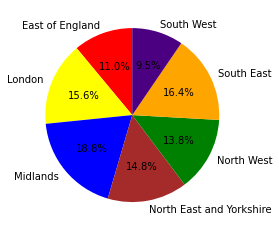

In [23]:
#Pie Chart
labels = list(summary_renamed.index.values)
sizes = summary_renamed["Total Cases"]
colors = ["red", "yellow", "blue", "brown", "green", "orange", "Indigo"]


plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct = "%1.1f%%", shadow = False)

plt.savefig("Total Cases Pie Chart.png")
plt.show()

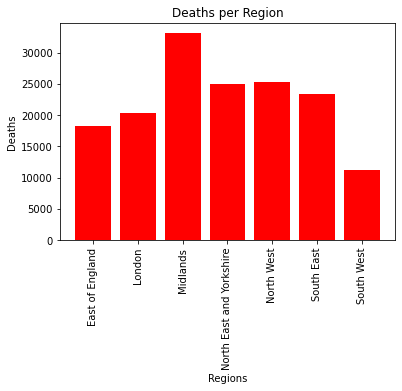

In [24]:
#Bar Graph of Deaths Per Region
x_axis = list(summary_renamed.index.values)
plt.bar(x_axis, summary_renamed["Total Deaths"], color = "red" )
plt.title("Deaths per Region")
plt.xlabel("Regions")
plt.ylabel("Deaths")
plt.xticks(rotation = "vertical")
plt.savefig("Deaths Per Region.png")
plt.show()

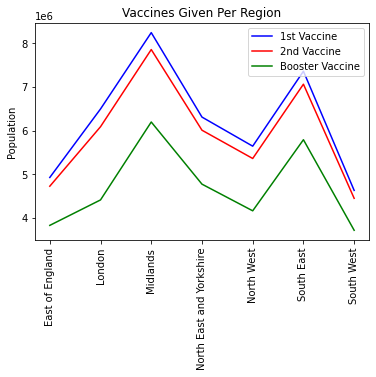

In [25]:
#Vaccines plot
vaccine1, = plt.plot(x_axis, summary_renamed["1st Vaccine Total"], color="blue", label="1st Vaccine")
vaccine2, = plt.plot(x_axis, summary_renamed["2nd Vaccine Total"], color="red", label="2nd Vaccine")
booster = plt.plot(x_axis, summary_renamed["Total Booster Vaccinations"], color="green", label="Booster Vaccine")
plt.legend(loc="best")
plt.title("Vaccines Given Per Region")
plt.ylabel("Population")
plt.xticks(rotation = "vertical")
plt.savefig("Vaccines Given Per Region.png")
plt.show()

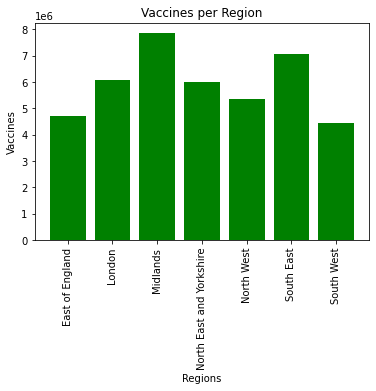

In [26]:
#Vaccine per region
x_axis = list(summary_renamed.index.values)
plt.bar(x_axis, summary_renamed["2nd Vaccine Total"], color = "green" )
plt.title("Vaccines per Region")
plt.xlabel("Regions")
plt.ylabel("Vaccines")
plt.xticks(rotation = "vertical")
plt.savefig("Vaccines per Region.png")
plt.show()

# Graphs (UK data overall)

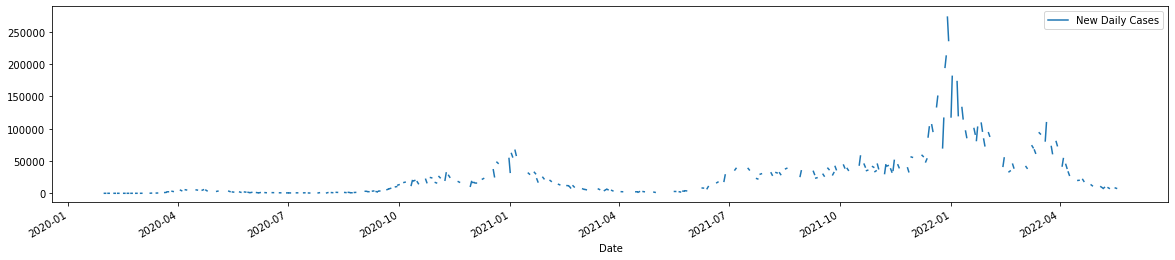

In [65]:
newcases_fig = all_merged_sorted.plot.line(x="Date", y="New Daily Cases", figsize=(20, 4))
fig3 = newcases_fig.get_figure()
fig3.savefig("New_Daily_Cases_Over_Time.png")

The figure above shows the number of cases from January 2020 to the present date. As we can see, in early 2020, the virus was relatively unknown, and numbers in the UK were extremely low.

Lockdown dates: 23rd 
 - March-10th May 2020 
 - 5th November-2nd December 2020
 - 6th January2021 - 22nd February 2021
 
There is a small peak in cases around Jan 2021, and vaccine rollouts began during this time. 

More social distancing meant less chance of virus transmission. 

January 2022 shows the highest peak in new number of daily cases, with the next highest peak in April 2022. We will see in the next few graphs the daily deaths and hospital admissions.

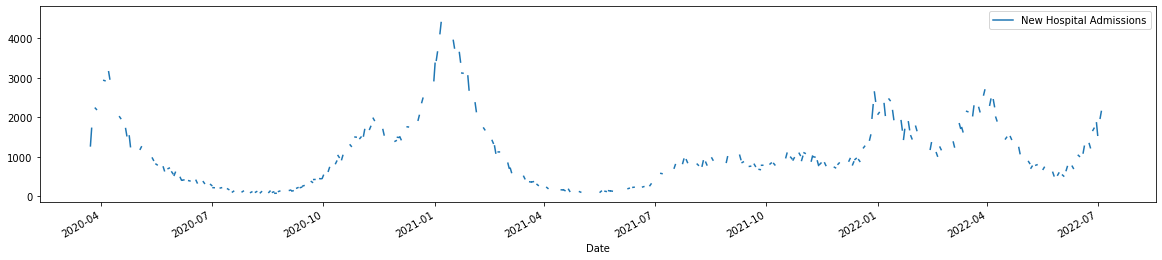

In [64]:
hospitaladmissions_fig = all_merged_sorted.plot.line(x="Date", y="New Hospital Admissions", figsize=(20, 4))
fig2 = hospitaladmissions_fig.get_figure()
fig2.savefig("Hospital_Admissions_Over_Time.png")

The graph above shows that the number of hospital admissions with covid was quite high during the beginning of the pandemic. The highest new hospital admissions were around christmas and January 2021. This goes down steeply in January 2021 as well, which is when another national lockdown was announced. January 2022 sees another rise in daily hospital admissions (this peak is only half as high as the previous January) - this is during a time when there are no lockdowns and no covid restrictions. 
It is also interesting to see that 2022 has a number of peaks of daily hospital admissions - a time when there are no covid restrictions, and vaccinations have been rolled out for over a year. It is particularly interesting that the summer months are experiencing a number of peaks in admissions.

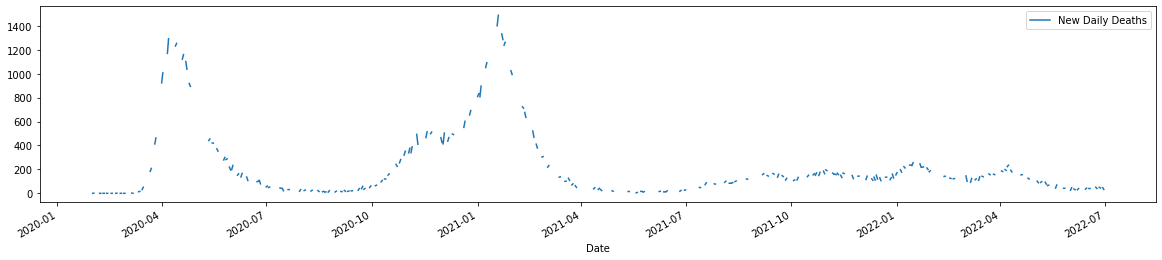

In [62]:
deaths_fig = all_merged_sorted.plot.line(x="Date", y="New Daily Deaths", figsize=(20, 4))
fig1 = deaths_fig.get_figure()
fig1.savefig("New_Daily_Deaths_Over_Time.png")

The graph above shows how the number of daily deaths where 'covid' was stated as the reason of death on the death certificate. 

We can see March-April 2020 (around the beginning of the pandemic), there was a peak in daily deaths reported. This declines sharply as a national lockdown was enforced. During the end of 2020 and the beginning of January, we can see the highest number of deaths reported daily. This again declines shaprly during another national lockdown. The vaccine rollout also began in January 2021, and we can see that the number of daily deaths does not come close to the figures reported before the vaccine rollout, even when there is no lockdown. 

### Insights from UK figures

- National lockdowns seem to be effective in reducing both hospital admissions and number of daily deaths
- Since the vaccine rollout, the number of daily deaths has reduced drastically, but not the number of cases

### Heatmaps

In [27]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

api_key = g_key
region = full_covid_renamed["Region"].unique()
lat = []
lng = []
region_list = []
for region in region:
    query_url = f'{base_url}address={region},UK&key={api_key}'
    response = requests.get(query_url).json()
    lat.append(response["results"][0]["geometry"]["location"]["lat"])
    lng.append(response["results"][0]["geometry"]["location"]["lng"])
    region_list.append(region)
coords_df = pd.DataFrame({"Region": region_list,
                         "Latitude": lat,
                         "Longitude": lng})
coords_df


NameError: name 'g_key' is not defined

In [28]:
full_covid_renamed = pd.merge(full_covid_renamed,coords_df, how = "left", on = "Region")
full_covid_renamed

NameError: name 'coords_df' is not defined

In [29]:
pre_lockdown_df = full_covid_renamed[full_covid_renamed["Date"] == "26/03/2020"]
pre_lockdown_df

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp
838,South West,26/03/2020,118,739,NaN,NaN,11.0,64.0,86.0,454.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09
1729,Midlands,26/03/2020,466,3102,0.0,0.0,69.0,335.0,356.0,1918.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09
2611,North West,26/03/2020,357,1858,NaN,NaN,31.0,165.0,184.0,836.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09
3503,North East and Yorkshire,26/03/2020,274,1582,0.0,0.0,23.0,85.0,196.0,863.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09
4366,London,26/03/2020,740,6335,NaN,NaN,123.0,657.0,519.0,3494.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09
5257,South East,26/03/2020,320,2386,NaN,NaN,45.0,253.0,138.0,894.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09
6148,East of England,26/03/2020,216,1342,NaN,NaN,34.0,134.0,160.0,520.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09


In [30]:
post_lockdown_df = full_covid_renamed[full_covid_renamed["Date"] == "10/05/2020"]
post_lockdown_df["New Cases"].max()

448

### Post Lockdown Heatmap

In [31]:
places = post_lockdown_df[["Latitude","Longitude"]]

fig = gmaps.figure(zoom_level = 2, center = [0,0])

heat_layer = gmaps.heatmap_layer(places, weights = post_lockdown_df["New Cases"], max_intensity = 450, point_radius = 60)

fig.add_layer(heat_layer)
fig

KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

### Pre Lockdown Heatmap

In [32]:
places = pre_lockdown_df[["Latitude","Longitude"]]

fig = gmaps.figure(zoom_level = 2, center = [0,0])

heat_layer = gmaps.heatmap_layer(places, weights = pre_lockdown_df["New Cases"], max_intensity = 450, point_radius = 60)

fig.add_layer(heat_layer)
fig

KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

Points to note:   
London was significanltly reduced by lockdown.   
The North and South West appear to have very little change by during Lockdown

## Hypothesis Testing

In [57]:
#The booster vaccine has no effect on the number of deaths
population1 = summary_renamed["Total Deaths"]
population2 = summary_renamed["Total Booster Vaccinations"]
stats.ttest_ind(population1, population2, equal_var = False)

Ttest_indResult(statistic=-12.825826169057027, pvalue=1.3791293010314272e-05)

## Interpretation of Hypothesis
Null hypothesis= The booster vaccine has no effect on the number of deaths. Alternative hypothesis = The booster vaccine causes a reduction on the number of deaths.

## Result
After conducting a T-Test, the pvalue was found to be smaller than 0.05, therefore we uphold the Null hypothesis. This means that indeed the booster vaccine has no effect on the number of deaths

In [58]:
#The population of a location has no effect on its cases
#import the csv with population
population_csv = "Population.csv" 
population_df = pd.read_csv(population_csv)
population_df = pd.merge(summary_renamed, population_df, on="Region", how= "outer" )
population_df = population_df[["Region", "Total Cases", "Total Reinfections", "Total Deaths", "Total Hospital Admissions", 
                  "1st Vaccine Total", "2nd Vaccine Total", "Total Booster Vaccinations", "Timestamp", "Date",
                 "Population"]]
population_df

,Region,Total Cases,Total Reinfections,Total Deaths,Total Hospital Admissions,1st Vaccine Total,2nd Vaccine Total,Total Booster Vaccinations,Timestamp,Date,Population
0,East of England,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0,1.670371e+09,2022-12-07,6236072
1,London,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0,1.670371e+09,2022-12-07,8961989
2,Midlands,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0,1.670371e+09,2022-12-07,10769965
3,North East and Yorkshire,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0,1.670371e+09,2022-12-07,8172908
4,North West,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0,1.670371e+09,2022-12-07,7341196
5,South East,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0,1.670371e+09,2022-12-07,9180135
6,South West,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0,1.670371e+09,2022-12-07,5624696


In [35]:
population1 = population_df["Total Cases"]
population2 = population_df["Population"]
stats.ttest_ind(population1, population2, equal_var = False)

Ttest_indResult(statistic=-7.401089612870435, pvalue=0.00011441184849113832)

## Interpretation
Null hypothesis = The population of a location has no effect on the number of cases recorded.

## Result
After conducting a T-Test, the pvalue was found to be smaller than 0.05, therefore we uphold the Null hypothesis. This means that indeed population has no effect on the number of deaths.
